In [59]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def mean(data,a):
    print(data[a].mean())
    print(data[a].std())

def box_polt(a):
    zhongwei = a.median()
    mean = a.mean()
    q1 = a.quantile(0.25)
    q2 = a.quantile(0.5)
    q3 = a.quantile(0.75)
    q4 = a.quantile(1)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    print('--------------')
    print('中位:',zhongwei)
    print('平均:',mean)    
    print('--------------')
    print('50% :',q2)
    print('75% :',q3)
    print('100%:',upper)
    print('max :',q4)
    print('--------------')
    list_ = []
    list_.append(q2)
    list_.append(q3)
    list_.append(upper)
    return list_

def data_order(a,b):
#     lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
#     code = 'gbk'
    data = improt_data(lujing,code)
    if b == 0:
        df_hsh_max = data[data['入店人数'] > a]
        k = df_hsh_max
        return k
    elif a == 0:
        df_hsh_min = data[data['入店人数'] < b  ]
        k = df_hsh_min
        return k
    else:
        df_hsh_ = data[(data['入店人数'] >a) & (data['入店人数'] < b) ]
        k = df_hsh_
        return k 
    
def linear(x,y):

    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看：')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(x1,y1):   
    x = x1
    y = y1
    data_min = data_order(x,y)
    baoguang = data_min['入店人数'].values.reshape(-1,1)
    jindian = data_min['下单人数'].values.reshape(-1, 1)
    linear(baoguang,jindian)

def drop(data):
    a = data
    a.drop_duplicates(subset='商家ID',inplace = True,keep = 'last')
    print(a['商家ID'].count())


def cluster_look(data):
    list_ = [1,3,0,2]
    for i in list_:
        df = data[data['cluster'] == i]
        i = str(i)
        print('cluster_' + i +'等级的门店数量:' + str(df['cluster'].count()))    


In [3]:
lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [4]:
# data.describe()

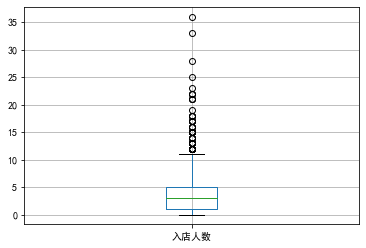

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
data.boxplot('入店人数')

In [7]:
a = data['入店人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0
print(q1)
print(q2)
print(q3)

--------------
中位: 3.0
平均: 3.4886492622020433
--------------
50% : 3.0
75% : 5.0
100%: 11.0
max : 36.0
--------------
3.0
5.0
11.0


In [8]:
line_bg_rd(q04,q1)
print(''' ''') 

line_bg_rd(q1,q2)
print(''' ''') 
line_bg_rd(q2,q3)
print(''' ''') 
line_bg_rd(q3,q04)

数据分集查看：
X训练 (658, 1)
y训练 (658, 1)
X测试 (220, 1)
y测试 (220, 1)
-------------
线性结截距: [-0.00102235]
回归系数 [[0.02822483]]
RMSE: 0.2165429042362803
 
数据分集查看：
X训练 (135, 1)
y训练 (135, 1)
X测试 (46, 1)
y测试 (46, 1)
-------------
线性结截距: [0.21481481]
回归系数 [[0.]]
RMSE: 0.3471909271994642
 
数据分集查看：
X训练 (178, 1)
y训练 (178, 1)
X测试 (60, 1)
y测试 (60, 1)
-------------
线性结截距: [-0.53520085]
回归系数 [[0.12659164]]
RMSE: 0.7402493654384916
 
数据分集查看：
X训练 (49, 1)
y训练 (49, 1)
X测试 (17, 1)
y测试 (17, 1)
-------------
线性结截距: [0.25805542]
回归系数 [[0.03513666]]
RMSE: 1.2438519849783254


In [9]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)

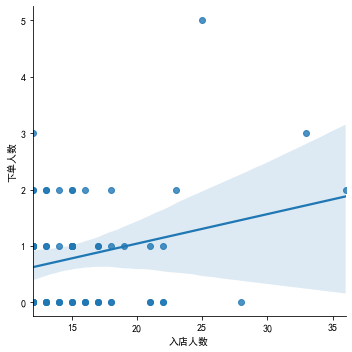

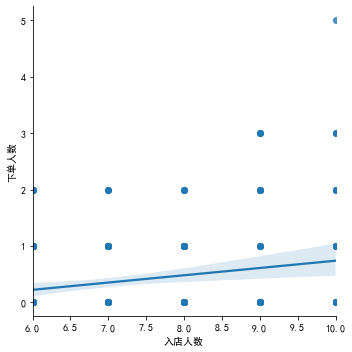

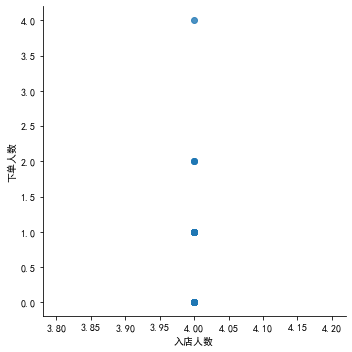

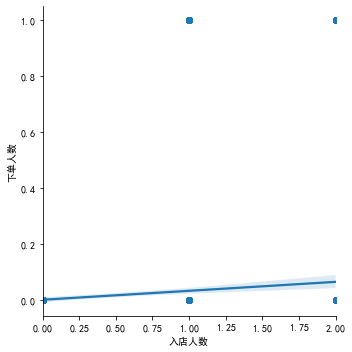

In [10]:
sns.lmplot(x="入店人数", y="下单人数",data=data_max,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_one,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_two,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_min,fit_reg=True)

In [17]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

16
74
78
110


In [5]:
-----------------------------------------------------------------------------------------------------------------------------

SyntaxError: invalid syntax (<ipython-input-5-9e8be9d5cc00>, line 1)

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [48]:
lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Mdata_kmeans.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [49]:
# data

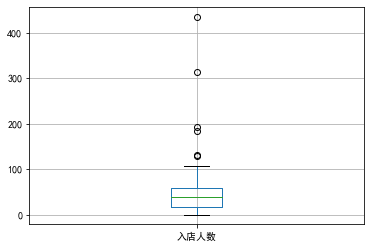

In [50]:
data.boxplot('入店人数')

In [51]:
a = data['入店人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0
print(q1)
print(q2)
print(q3)

--------------
中位: 38.0
平均: 46.705882352941174
--------------
50% : 38.0
75% : 59.0
100%: 123.5
max : 435.0
--------------
38.0
59.0
123.5


In [52]:
line_bg_rd(q04,q1)
print(''' ''') 

line_bg_rd(q1,q2)
print(''' ''') 
line_bg_rd(q2,q3)
print(''' ''') 
line_bg_rd(q3,q04)

数据分集查看：
X训练 (43, 1)
y训练 (43, 1)
X测试 (15, 1)
y测试 (15, 1)
-------------
线性结截距: [0.25499976]
回归系数 [[0.02018122]]
RMSE: 1.714499011832187
 
数据分集查看：
X训练 (21, 1)
y训练 (21, 1)
X测试 (7, 1)
y测试 (7, 1)
-------------
线性结截距: [-3.01002963]
回归系数 [[0.10941418]]
RMSE: 1.7993388387864726
 
数据分集查看：
X训练 (18, 1)
y训练 (18, 1)
X测试 (6, 1)
y测试 (6, 1)
-------------
线性结截距: [7.17632552]
回归系数 [[-0.0494099]]
RMSE: 3.3861610830977953
 
数据分集查看：
X训练 (4, 1)
y训练 (4, 1)
X测试 (2, 1)
y测试 (2, 1)
-------------
线性结截距: [12.95927477]
回归系数 [[0.03186711]]
RMSE: 14.216794459659901


In [53]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)


In [54]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

6
24
28
58


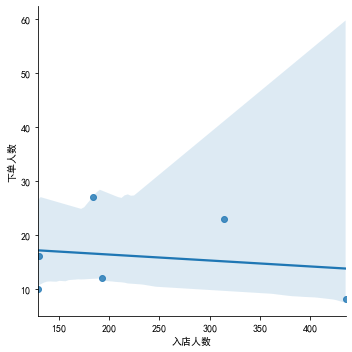

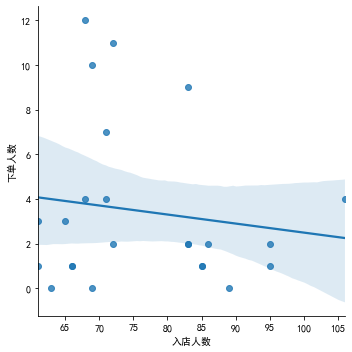

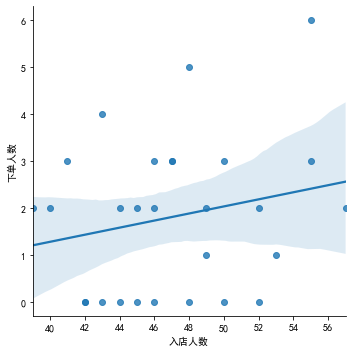

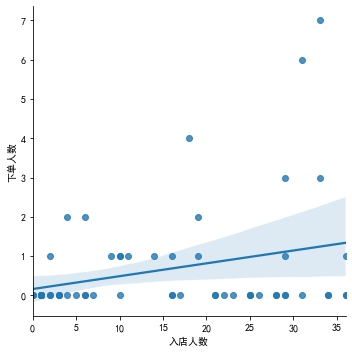

In [55]:
sns.lmplot(x="入店人数", y="下单人数",data=data_max,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_one,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_two,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_min,fit_reg=True)

In [56]:
# data_max.count()
# print(data_min.count())
data_max

,Unnamed: 0,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,有效订单数,下单新客人数,复购人数,入店转化率,下单转化率,新客转化率,复购率,原价交易额,实付交易额,商家补贴金额,原价客单价,实付客单价,cluster
0,1,20200601,20200630,9024278,友新意鲜花坊,鲜花组,陕西省,西安,否,20200508,在线,18,18.0,18362,314,23,22,21,2,1.71,0.07,0.913043,0.086957,4962,2596,2431,215.739130,112.869565,1
1,7,20200601,20200630,9043317,花坞,鲜花组,福建省,福州,否,20200508,在线,18,18.0,11259,435,8,7,7,1,3.86,0.02,0.875000,0.125000,2702,1443,1279,337.750000,180.375000,1
3,60,20200601,20200630,9323842,花无缺鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,12,11.6,4806,129,10,7,7,3,2.68,0.08,0.700000,0.300000,1553,671,902,155.300000,67.100000,3
5,10,20200601,20200630,9043994,八度花艺,鲜花组,河南省,许昌,否,20200508,在线,15,15.5,4116,193,12,7,7,5,4.69,0.06,0.583333,0.416667,1763,986,777,146.916667,82.166667,3
6,45,20200601,20200630,9295286,婉苑鲜花婚庆,鲜花组,黑龙江省,齐齐哈尔,否,20200611,在线,17,17.1,3895,130,16,17,16,0,3.34,0.12,1.000000,0.000000,3993,1602,3554,249.562500,100.125000,3
19,20,20200601,20200630,9223872,天天花坊,鲜花组,湖南省,郴州,否,20200602,在线,13,13.8,2527,184,27,26,26,1,7.28,0.15,0.962963,0.037037,6025,2308,3827,223.148148,85.481481,0


In [57]:
cluster_look(data_max)
print('-------------')
cluster_look(data_one)
print('-------------')
cluster_look(data_two)
print('-------------')
cluster_look(data_min)

cluster_1等级的门店数量:2
cluster_3等级的门店数量:3
cluster_0等级的门店数量:1
cluster_2等级的门店数量:0
-------------
cluster_1等级的门店数量:0
cluster_3等级的门店数量:8
cluster_0等级的门店数量:15
cluster_2等级的门店数量:1
-------------
cluster_1等级的门店数量:0
cluster_3等级的门店数量:3
cluster_0等级的门店数量:24
cluster_2等级的门店数量:1
-------------
cluster_1等级的门店数量:0
cluster_3等级的门店数量:0
cluster_0等级的门店数量:18
cluster_2等级的门店数量:40


In [58]:
mean(data_max,'下单转化率')
print('-------------------')
mean(data_one,'下单转化率')
print('--------------------')
mean(data_two,'下单转化率')
print('--------------------')
mean(data_min,'下单转化率')

0.08333333333333333
0.04589843860815601
-------------------
0.04750000000000001
0.05118168830149416
--------------------
0.03785714285714286
0.03303837755602401
--------------------
0.049827586206896556
0.10895824694132852
